### Ustawienia Pythona

In [3]:
%load_ext autoreload
%autoreload 2
import sys

sys.path.insert(0, "src")

from graph_generation import generate_city_graph, load_cracow_city_graph
from initial_population import create_initial_population

from common.Genotype import Genotype
from common.params import SimulationParams

from new_generation.Mutators import LineMutator, GenotypeMutator
from new_generation.SpecimenCrossers import GenotypeCrosser
from new_generation.Sanitizers import BasicSanitizer
from new_generation.new_generation_function import NewGenerationRandomParams
from SimultionEngine import SimulationEngine
from survival import n_best_survive
from common.params import N_IN_POPULATION, SEED, N
from new_generation.new_generation_function import new_generation_random
from fitness import fitness

import random
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Najlepsze parametry

In [6]:
# see docs for math model for explanation
params = SimulationParams(
    R=2, alpha=0.05, beta=0.6, K=lambda S: S, delta=0.7, osmnx=False  # identity
)

new_generation_params = NewGenerationRandomParams(
    chance_create_line=0.1,
    chance_cycle=0.1,
    chance_erase_line=0.1,
    chance_invert=0.5,
    chance_merge=0.25,
    chance_merge_specimen=0.5,
    chance_rot_cycle=0.5,
    chance_rot_right=0.5,
    chance_split=0.75,
    chance_erase_stop=0.1,
    chance_add_stop=0.3,
    chance_add_stop_mix=0.1,
    chance_replace_stops=0.1,
    chance_replace_stops_proximity=0.1,
    chance_merge_mix=0.5,  # brak wplywu
    cycle_stops_shift=0.5,  # brak wplywu
    chance_cycle_stops_shift=0.1,
    chance_line_based_merge=0.1,
)

## Mapa generowana

In [7]:
random.seed(SEED)
G, best_paths = generate_city_graph(N)

In [8]:
population = create_initial_population(G, best_paths)

Epoch:                                      0
best fitness function:            -104.987373
no of lines:                               10
longest line:                              19
shortest line:                              4



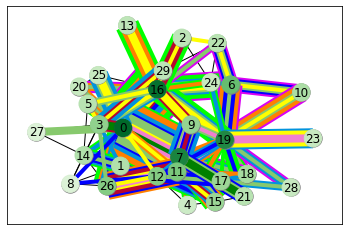

Epoch:                                     10
best fitness function:              13.922535
no of lines:                                7
longest line:                              15
shortest line:                              2



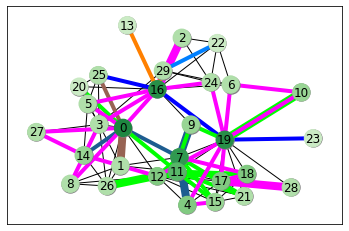

Epoch:                                     20
best fitness function:              21.038133
no of lines:                               12
longest line:                               9
shortest line:                              1



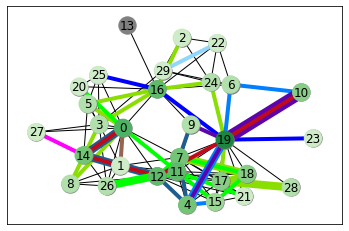

Epoch:                                     30
best fitness function:              26.238760
no of lines:                               17
longest line:                               8
shortest line:                              1



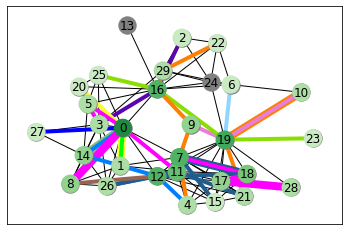

Epoch:                                     40
best fitness function:              28.535527
no of lines:                               19
longest line:                               5
shortest line:                              1



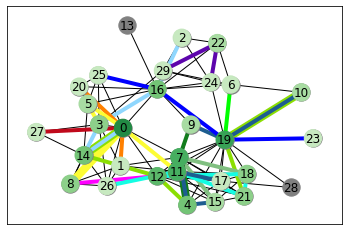

Epoch:                                     50
best fitness function:              30.382254
no of lines:                               18
longest line:                               4
shortest line:                              1



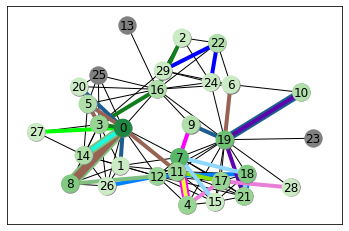

Epoch:                                     60
best fitness function:              31.783405
no of lines:                               19
longest line:                               4
shortest line:                              1



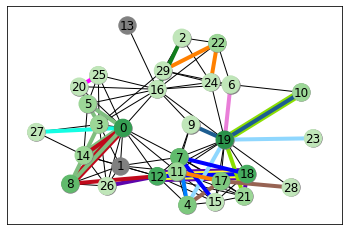

Epoch:                                     70
best fitness function:              32.964722
no of lines:                               18
longest line:                               4
shortest line:                              1



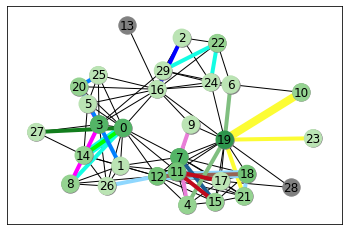

Epoch:                                     80
best fitness function:              33.790506
no of lines:                               19
longest line:                               4
shortest line:                              1



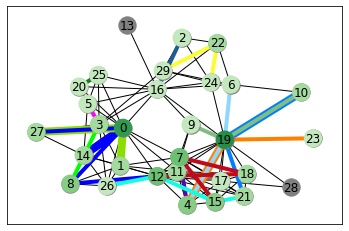

Epoch:                                     90
best fitness function:              34.221201
no of lines:                               20
longest line:                               4
shortest line:                              1



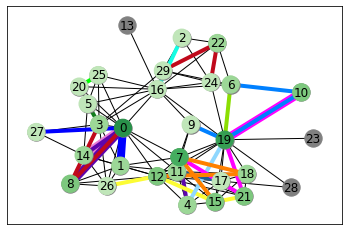

Epoch:                                    100
best fitness function:              34.711370
no of lines:                               22
longest line:                               4
shortest line:                              1



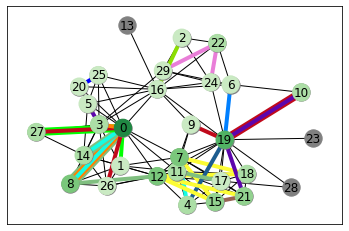

In [9]:
line_mutator = LineMutator(G, list(G.nodes), best_paths)
genotype_mutator = GenotypeMutator(G, best_paths)
genotype_crosser = GenotypeCrosser(G, best_paths)
sanitizer = BasicSanitizer(best_paths)

sim_engine = SimulationEngine(
    G,
    initial_population=create_initial_population(G, best_paths),
    fitness_function=fitness,
    survival_function=lambda population: n_best_survive(
        population, N_IN_POPULATION // 8
    ),
    new_generation_function=lambda population, graph: new_generation_random(
        population,
        N_IN_POPULATION,
        line_mutator,
        genotype_mutator,
        genotype_crosser,
        sanitizer,
        new_generation_params,
    ),
    population_sanitizer=sanitizer,
    simulation_params=params.no_osmnx(),
)

F = sim_engine.run(100, 10, report_show=True)

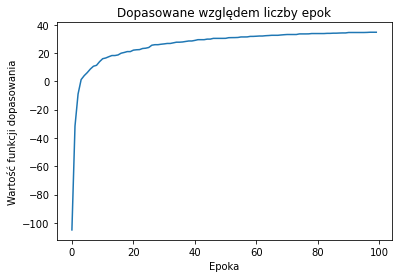

In [10]:
plt.plot(list(range(len(F))), F)
plt.xlabel("Epoka")
plt.ylabel("Wartość funkcji dopasowania")
plt.title("Dopasowane względem liczby epok")
plt.show()

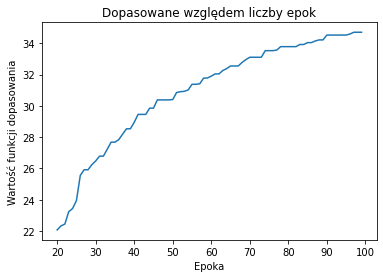

In [13]:
plt.plot(list(range(20, len(F))), F[20:])
plt.xlabel("Epoka")
plt.ylabel("Wartość funkcji dopasowania")
plt.title("Dopasowane względem liczby epok")
plt.show()

## Mapa Krakowa

In [14]:
G, best_paths = load_cracow_city_graph()

In [18]:
population = create_initial_population(G, best_paths)

Epoch:                                      0
best fitness function:       219121085.000825
no of lines:                               10
longest line:                             120
shortest line:                             20



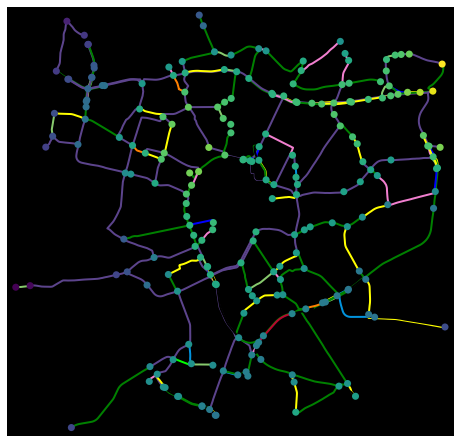

Epoch:                                      1
best fitness function:       219121085.000825
no of lines:                               10
longest line:                             120
shortest line:                             20



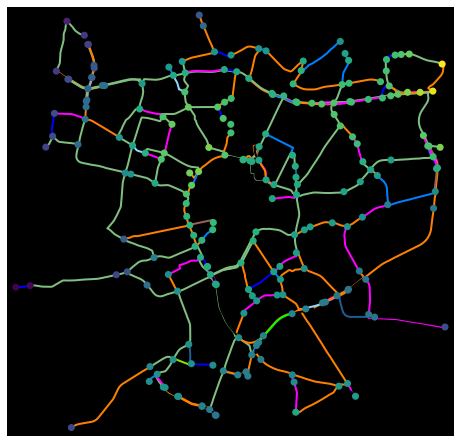

Epoch:                                      2
best fitness function:       256007663.774880
no of lines:                               10
longest line:                             142
shortest line:                             19



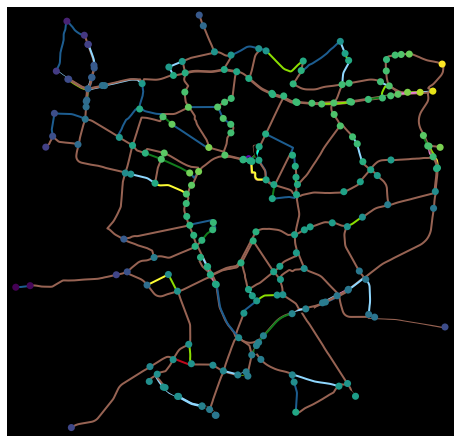

Epoch:                                      3
best fitness function:       286447067.533144
no of lines:                               19
longest line:                             131
shortest line:                             66



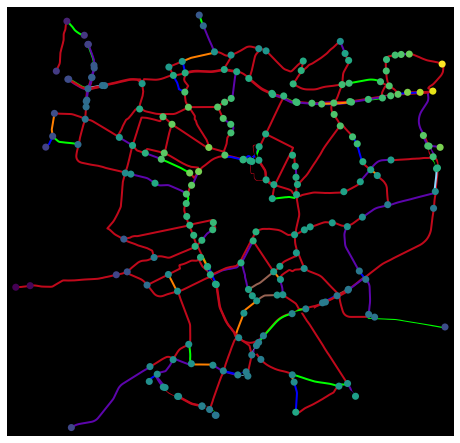

Epoch:                                      4
best fitness function:       314715778.250159
no of lines:                               39
longest line:                             143
shortest line:                             58



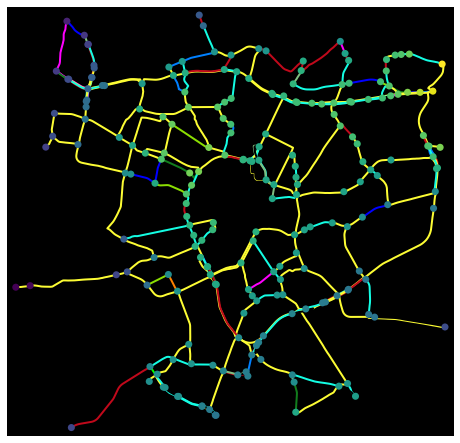

Epoch:                                      5
best fitness function:       318916736.108053
no of lines:                               48
longest line:                             143
shortest line:                             12



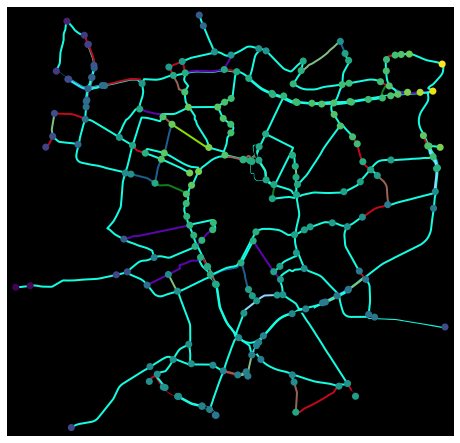

Epoch:                                      6
best fitness function:       324845090.141020
no of lines:                               76
longest line:                             251
shortest line:                             14



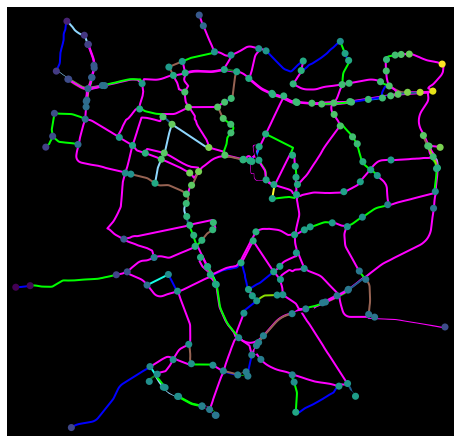

Epoch:                                      7
best fitness function:       325227802.790706
no of lines:                               90
longest line:                             273
shortest line:                             29



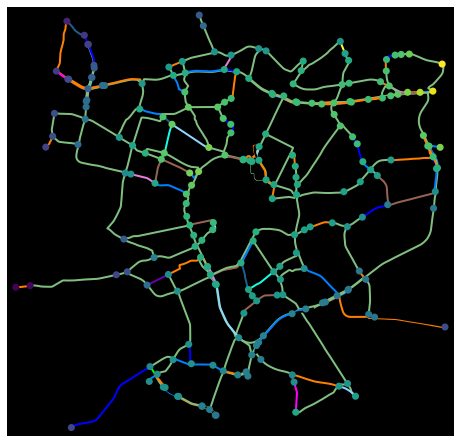

Epoch:                                      8
best fitness function:       325412540.938474
no of lines:                               87
longest line:                             142
shortest line:                             33



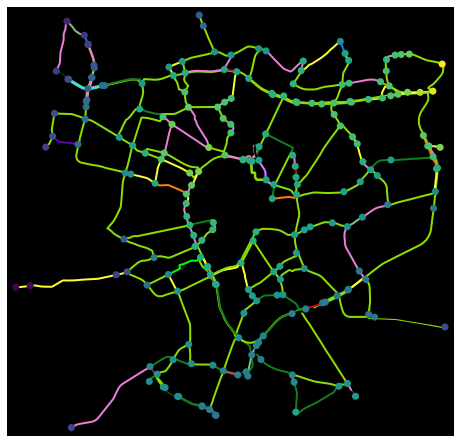

Epoch:                                      9
best fitness function:       325745013.003359
no of lines:                               81
longest line:                             273
shortest line:                             46



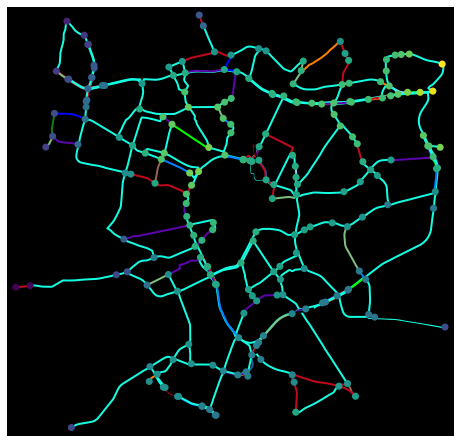

Epoch:                                     10
best fitness function:       325910022.595175
no of lines:                               80
longest line:                             273
shortest line:                             31



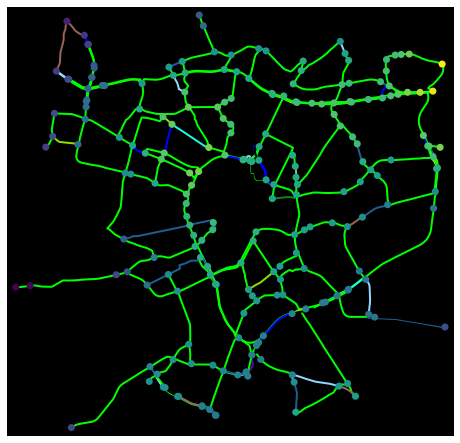

In [21]:
line_mutator = LineMutator(G, list(range(len(G))), best_paths)
genotype_mutator = GenotypeMutator(G, best_paths)
genotype_crosser = GenotypeCrosser(G, best_paths)
sanitizer = BasicSanitizer(best_paths)

sim_engine = SimulationEngine(
    G,
    initial_population=create_initial_population(G, best_paths),
    fitness_function=fitness,
    survival_function=lambda population: n_best_survive(
        population, N_IN_POPULATION // 8
    ),
    new_generation_function=lambda population, graph: new_generation_random(
        population,
        N_IN_POPULATION,
        line_mutator,
        genotype_mutator,
        genotype_crosser,
        sanitizer,
        new_generation_params,
    ),
    population_sanitizer=sanitizer,
    simulation_params=params.with_osmnx().with_quadrature_scaling(),
)

F = sim_engine.run(10, 1, report_show=True)

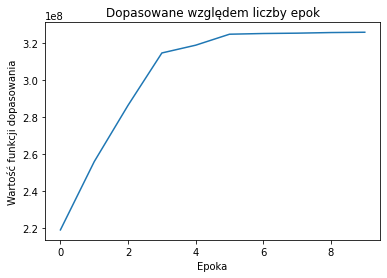

In [23]:
plt.plot(list(range(len(F))), F)
plt.xlabel("Epoka")
plt.ylabel("Wartość funkcji dopasowania")
plt.title("Dopasowane względem liczby epok")
plt.show()